In [1]:
import pandas as pd
df = pd.read_csv("random_random_1000.csv")

In [2]:
df.head()

,10,turn_10,9,turn_9,8,turn_8,7,turn_7,6,turn_6,...,turn_5,4,turn_4,3,turn_3,2,turn_2,1,turn_1,winner
0,1,player_1,2,player_2,0,NaN,2,player_1,0,NaN,...,player_2,2,player_1,0,NaN,1,player_2,1.0,player_1,player_1
1,1,player_1,2,player_2,0,NaN,1,player_1,1,player_2,...,player_1,0,NaN,2,player_2,0,NaN,1.0,player_1,player_1
2,1,player_1,1,player_2,2,player_1,0,NaN,1,player_2,...,player_1,1,player_2,1,player_1,1,player_2,1.0,player_1,player_1
3,1,player_1,1,player_2,2,player_1,0,NaN,2,player_2,...,NaN,2,player_1,0,NaN,1,player_2,NaN,player_1,player_2
4,2,player_1,0,NaN,2,player_2,0,NaN,1,player_1,...,player_2,2,player_1,0,NaN,2,player_2,0.0,NaN,player_2


In [3]:
df2 = pd.DataFrame(index = range(10), columns = [1,2])
df2.head()

,1,2
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


process data to make it useful: 
1. do not consider games where on turn x player was unable to take any toothpicks
2. for every possible move we can get the proportion of winning games where that was the move made(if player x made a move at 7 how often did they win with that move)
3. now we can write a new player class based on the moves already made and win percentage of said moves

 - use this random data to bulid better players.
 - write functions that can run 8 player tournaments with ranking based on win percentage.
 - automate and scale our current processes.
 - evolutionary game theory - generating new players based on old ones.

In [25]:
count = 0
series = []
n = 0
for item in df["winner"]:
    #print(item)
    if(item == "player_1"):
        count +=1
        series.append(df["10"][n])
    n+=1
        
#print(count)
#print(series)
df2 = pd.DataFrame(index = range(count), columns = ["first_move","winner"])
df2["first_move"] = series
for item in df2["winner"]:
    df2["winner"] = "player_1"
count = 0
series = []
df2.head()

,first_move,winner
0,1,player_1
1,1,player_1
2,1,player_1
3,2,player_1
4,2,player_1


<AxesSubplot:title={'center':'first move wins'}, xlabel='win'>

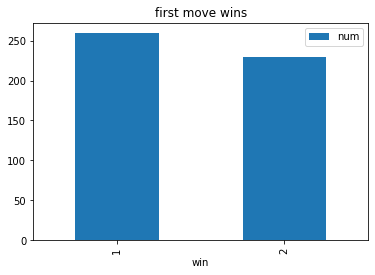

In [44]:
num1 = 0
num2 = 0
for item in df2["first_move"]:
    if item == 1:
        num1+=1
    else:
        num2+=1
        
ax = pd.DataFrame({'win':[1,2], 'num':[num1,num2]})
ax.plot.bar(x = "win", y = "num",title = "First Move Wins")

Using this simple plot we can see that taking 1 piece at the start give you a better chance at winning the game.  This gives us the first piece of a "strategy" to win the game.